# 1. Data
Location of the csv dataset ' Amazing Cart EU' https://www.artofvisualization.com/pages/tableau

Location of the API countries https://api.covid19api.com/summary

# 2. Importing 

Importing packages

In [34]:
import pandas as pd
import os 
import requests
import matplotlib.pyplot as plt
import seaborn as sns

### Custom Function

In [6]:
def Dataframe(a):  # creating a custom function to export dataframe to csv
    answer = a.to_csv('Project_Output.csv')     # this function is used instead of typing the .to_csv code everytime i want to extract dataframes to excel
    return answer

### Importing data from csv

In [2]:
# Finding current path
os.getcwd()

# Assigning csv files to dataframes
order_list = pd.read_csv('list_of_orders.csv' , parse_dates=['Order Date','Ship Date']) #reading list of orders file
order_breakdown = pd.read_csv('order_breakdown.csv') #reading list of orders file
order_breakdown

,Order_ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage
...,...,...,...,...,...,...,...,...
8042,AZ-2014-766953,"Ikea Stackable Bookrack, Traditional",0.0,245,91,2,Furniture,Bookcases
8043,BN-2014-4140795,"BIC Pencil Sharpener, Fluorescent",0.5,30,-10,2,Office Supplies,Art
8044,BN-2014-4140795,"Avery Binder Covers, Recycled",0.5,23,-6,4,Office Supplies,Binders
8045,BN-2014-4140795,"StarTech Phone, Red",0.5,108,-19,3,Technology,Machines


### Merging Dataframe

In [10]:
# Merging dataframes from csv
combined = pd.merge(order_list, order_breakdown, how='inner', on = 'Order_ID')
combined

,Order_ID,Order Date,Customer Name,City,CountryCode,Region,Segment,Ship Date,Order Shipment TimeFrame,Ship Mode,State,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,AT,Central,Consumer,2011-01-15,4,Economy,Vienna,"Boston Canvas, Fluorescent",0.0,55,10,1,Office Supplies,Art
1,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,AT,Central,Consumer,2011-01-15,4,Economy,Vienna,"Smead Trays, Single Width",0.0,97,31,2,Office Supplies,Storage
2,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,AT,Central,Home Office,2011-01-19,5,Economy,Vienna,"Xerox Message Books, Premium",0.0,224,103,11,Office Supplies,Paper
3,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,AT,Central,Home Office,2011-01-19,5,Economy,Vienna,"StarTech Card Printer, White",0.0,486,78,3,Technology,Machines
4,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,AT,Central,Home Office,2011-01-19,5,Economy,Vienna,"Apple Headset, with Caller ID",0.0,440,66,6,Technology,Phones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-8007090,2014-12-30,Mary Saterfiel,Plymouth,UK,North,Consumer,2015-03-01,4,Economy,England,"Fellowes Box, Single Width",0.0,39,2,2,Office Supplies,Storage
8043,AZ-2014-157670,2014-12-30,Max Ludwig,Edinburgh,UK,North,Home Office,2015-04-01,5,Economy,Scotland,"Office Star Chairmat, Adjustable",0.0,68,27,1,Furniture,Chairs
8044,AZ-2014-766953,2014-12-31,Jose Gambino,Maidenhead,UK,North,Corporate,2015-05-01,5,Economy,England,"Ikea Stackable Bookrack, Traditional",0.0,245,91,2,Furniture,Bookcases
8045,AZ-2014-766953,2014-12-31,Jose Gambino,Maidenhead,UK,North,Corporate,2015-05-01,5,Economy,England,"Motorola Audio Dock, VoIP",0.0,867,251,5,Technology,Phones


### Importing data from API

In [11]:
#Retrieving country codes & name from API
cv19 = requests.get('https://api.covid19api.com/summary')
cv19 = cv19.json()
df = pd.DataFrame(cv19['Countries'])
countries = df[["Country","CountryCode"]]
countries.head()

,Country,CountryCode
0,Afghanistan,AF
1,Albania,AL
2,Algeria,DZ
3,Andorra,AD
4,Angola,AO


# 2. Preparation

#### Merging dataframes from csv & API

In [19]:
df_joined_table = pd.merge(combined,countries, on='CountryCode', how='left')
df_merged = df_joined_table.drop('CountryCode', axis=1) # removing the 'Ship Mode' column

#code to check the number of nulls in the dataset 
df_merged.isnull().sum() 

#Writing the dataframe to a csv to check what countries are nulls
Dataframe(df_merged)

#UK did not have corresponding Country name , using code to replace the null values with 'United Kingdom'
df_merged.fillna('United Kingdom')
df_merged.head()

,Order_ID,Order Date,Customer Name,City,Region,Segment,Ship Date,Order Shipment TimeFrame,Ship Mode,State,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Country
0,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,Central,Consumer,2011-01-15,4,Economy,Vienna,"Boston Canvas, Fluorescent",0.0,55,10,1,Office Supplies,Art,Austria
1,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,Central,Consumer,2011-01-15,4,Economy,Vienna,"Smead Trays, Single Width",0.0,97,31,2,Office Supplies,Storage,Austria
2,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Central,Home Office,2011-01-19,5,Economy,Vienna,"Xerox Message Books, Premium",0.0,224,103,11,Office Supplies,Paper,Austria
3,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Central,Home Office,2011-01-19,5,Economy,Vienna,"StarTech Card Printer, White",0.0,486,78,3,Technology,Machines,Austria
4,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Central,Home Office,2011-01-19,5,Economy,Vienna,"Apple Headset, with Caller ID",0.0,440,66,6,Technology,Phones,Austria


### checking for duplicates

In [20]:

Dataframe(df_merged) #extracting the merged dataframes to csv 
#After looking at the dataset there was no duplicates , no need to perform remove dpulicates 

#### Ordering dataframe

In [21]:
df_merged.sort_values(by=['Order Date'], ascending=False)
df_merged.head()


,Order_ID,Order Date,Customer Name,City,Region,Segment,Ship Date,Order Shipment TimeFrame,Ship Mode,State,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Country
0,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,Central,Consumer,2011-01-15,4,Economy,Vienna,"Boston Canvas, Fluorescent",0.0,55,10,1,Office Supplies,Art,Austria
1,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,Central,Consumer,2011-01-15,4,Economy,Vienna,"Smead Trays, Single Width",0.0,97,31,2,Office Supplies,Storage,Austria
2,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Central,Home Office,2011-01-19,5,Economy,Vienna,"Xerox Message Books, Premium",0.0,224,103,11,Office Supplies,Paper,Austria
3,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Central,Home Office,2011-01-19,5,Economy,Vienna,"StarTech Card Printer, White",0.0,486,78,3,Technology,Machines,Austria
4,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Central,Home Office,2011-01-19,5,Economy,Vienna,"Apple Headset, with Caller ID",0.0,440,66,6,Technology,Phones,Austria


# 4. Analysis

#### Creating conditional statement
- *Creating new column to get difference between order date and shipping date*

In [28]:
def assign_Result(x):
    if (x == 2) or (x == 3) :
        return  'Priority Shipping'
    elif (x == 0) or (x == 1):
        return 'Next Day Shipping'
    elif x >= 4:
        return 'Standard Shipping'
    else:
        return 'Other'
df_merged['Shipping options'] = df_merged['Order Shipment TimeFrame'].apply(assign_Result)
#df_merged = df_merged.drop('Ship Mode', axis=1) # removing the 'Ship Mode' column
df_merged['Year'] = df_merged['Order Date'].dt.strftime('%Y')
df_merged['Month'] = df_merged['Order Date'].dt.strftime('%b')
df_merged['Month-Year'] = df_merged['Order Date'].dt.strftime('%m/%Y')
Dataframe(df_merged) #exporting the data without the 'ship mode' column
df_merged.head()

,Order_ID,Order Date,Customer Name,City,Region,Segment,Ship Date,Order Shipment TimeFrame,State,Product Name,...,Sales,Profit,Quantity,Category,Sub-Category,Country,Shipping options,Year,Month,Month-Year
0,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,Central,Consumer,2011-01-15,4,Vienna,"Boston Canvas, Fluorescent",...,55,10,1,Office Supplies,Art,Austria,Standard Shipping,2011,Nov,11/2011
1,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,Central,Consumer,2011-01-15,4,Vienna,"Smead Trays, Single Width",...,97,31,2,Office Supplies,Storage,Austria,Standard Shipping,2011,Nov,11/2011
2,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Central,Home Office,2011-01-19,5,Vienna,"Xerox Message Books, Premium",...,224,103,11,Office Supplies,Paper,Austria,Standard Shipping,2011,Jan,01/2011
3,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Central,Home Office,2011-01-19,5,Vienna,"StarTech Card Printer, White",...,486,78,3,Technology,Machines,Austria,Standard Shipping,2011,Jan,01/2011
4,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Central,Home Office,2011-01-19,5,Vienna,"Apple Headset, with Caller ID",...,440,66,6,Technology,Phones,Austria,Standard Shipping,2011,Jan,01/2011


#### Group by Country to aggregate sales 

In [29]:
#Sales by Country to see what top performing countries are
df_sales_by_country = df_merged.groupby(['Country','Year'])['Sales'].agg('sum')
#Dataframe(df_sales_by_country)
df_sales_by_country.head()
Dataframe(df_sales_by_country)

KeyError: 'Column not found: Sales'

### Creating For Loop 

In [30]:
#df_merged['Profit'].max()
high_value_cust = []
for index,row in df_merged.iterrows():
    if row['Profit'] > 1000:
        high_value_cust.append([row['Customer Name'],row['Profit']])
    else:
        continue
for i in high_value_cust:
    print(i[1])

1127
1868
1518
1164
1189
1019
1364
1112
1094
1130
1042
1151
1141
1990
2476
1445
1296
1015
1470
1220
1041
1050
1061
1759
1425
1528
2461
1990
1041
1898
1698
1033
1216
1420


# 5. Visualisation

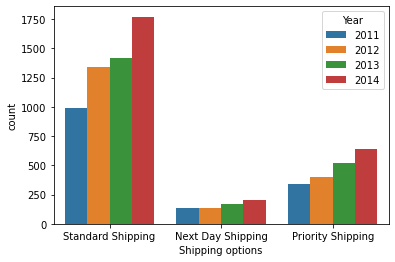

In [35]:
import matplotlib.pyplot as plt
sns.countplot(data=df_merged, x="Shipping options", hue="Year") 
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()


In [36]:
sns.lineplot(x="Month-Year", y="Sales", hue="Category", data=df_merged, ci=None)
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = [40, 5]
plt.show()

ValueError: Could not interpret value `Sales` for parameter `y`